In [63]:
import joblib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [64]:
n_task_per_file = 50
n_files = 10
base_dir = "vary_p_denser_"
files_list = []
for i in range(n_files):
    dir = base_dir + str(i*n_task_per_file) + "_"  + str((i+1)*n_task_per_file) + ".pkl"
    files_list.append(dir)

In [65]:
oper_char_df = pd.DataFrame()

for f_dir in files_list:
    oper_char_i = joblib.load(f_dir)
    oper_char_df = pd.concat([oper_char_df, pd.DataFrame(oper_char_i)])

In [66]:
oper_char_df

,Coverage Rate,Length,MSE,Method,p
0,1.000000,6.638547,26.781926,RRT,5
1,1.000000,36.028164,28.894286,Tree-Values,5
2,0.857143,11.398487,28.742214,UV(0.1),5
3,0.833333,6.902894,28.719365,RRT,10
4,1.000000,34.611952,29.723389,Tree-Values,10
...,...,...,...,...,...
595,1.000000,40.167204,27.288717,Tree-Values,20
596,0.666667,10.430843,28.502590,UV(0.1),20
597,0.833333,8.655280,32.988881,RRT,50
598,1.000000,14.418296,34.483272,Tree-Values,50


In [67]:
oper_char_df.index = range(oper_char_df.shape[0])

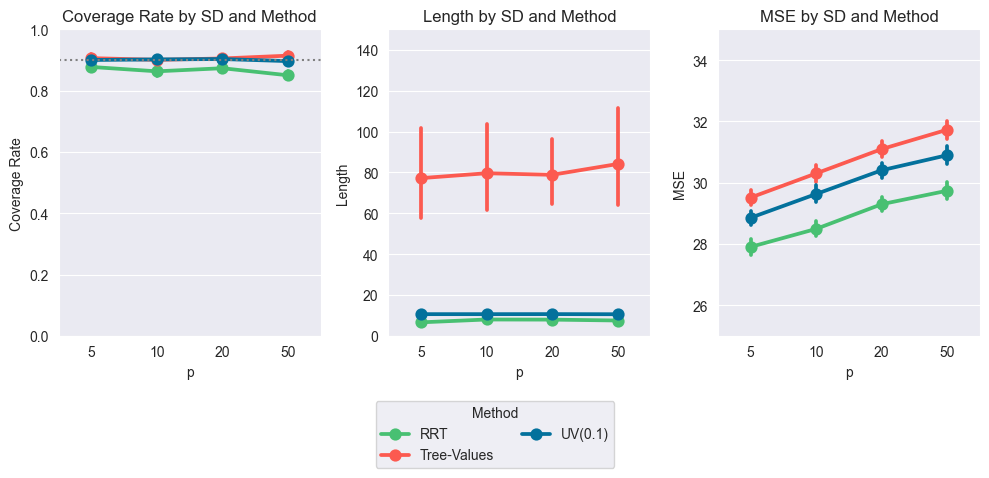

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your DataFrame is named df
metrics = ["Coverage Rate", "Length", "MSE"]

# Set up the figure and axes for subplots
fig, axes = plt.subplots(1, 3, figsize=(10, 4), sharey=False)

my_palette = {"RRT": "#48c072",
              "Tree-Values": "#fc5a50",
              "UV(0.1)": "#03719c"}

# Iterate over each metric and create a box plot
for i, metric in enumerate(metrics):
    sns.pointplot(x='p', y=metric, hue='Method', data=oper_char_df, ax=axes[i],
                palette=my_palette)
    axes[i].set_title(f'{metric} by SD and Method')
    axes[i].set_xlabel('p')
    #axes[i].set_ylabel(metric if i == 0 else '')  # Only set ylabel on the first plot for clarity
    axes[i].legend(title='Method', loc='upper right')
    if metric == "Coverage Rate":
        axes[i].set_ylim(0.,1)
        axes[i].axhline(y=0.9, linestyle='dotted', color='grey')
    elif metric == "Length":
        axes[i].set_ylim(0,150)
    elif metric == "MSE":
        axes[i].set_ylim(25,35)

# Remove legends from individual subplots
for ax in axes:
    ax.legend_.remove()

# Create a shared legend for the figure
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, title="Method", loc="upper center", bbox_to_anchor=(0.5, 0), ncol=2)

# Adjust layout and display
plt.tight_layout()
plt.show()



In [69]:
means = oper_char_df.groupby(['Method', "p"])[["Coverage Rate", "Length", "MSE"]].mean().reset_index()
means

,Method,p,Coverage Rate,Length,MSE
0,RRT,5,0.877590,6.581256,27.901729
1,RRT,10,0.863352,7.972121,28.489923
2,RRT,20,0.873481,7.909289,29.295826
3,RRT,50,0.850414,7.480986,29.736358
4,Tree-Values,5,0.906417,inf,29.512994
5,Tree-Values,10,0.900857,inf,30.301299
6,Tree-Values,20,0.905350,inf,31.094837
7,Tree-Values,50,0.914512,84.115871,31.727503
8,UV(0.1),5,0.900338,10.592144,28.853488
9,UV(0.1),10,0.902257,10.589996,29.628769


In [61]:
tree_flag = (oper_char_df['Method'] == "Tree-Values")

In [62]:
oper_char_df[tree_flag].groupby(['p'])['Length'].apply(lambda x: np.isinf(x).mean()).reset_index(name='proportion_infinity')

,p,proportion_infinity
0,5,0.002
1,10,0.002
2,20,0.002
3,50,0.000
